# E-tivity 3: Clustering and Manifold Learning

Use this notebook to complete Tasks 1 and 2 in E-tivity3.

#### Student ID: 18200036
#### Name: Brian Parle

### Import Python Modules

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing

## Task 1 Begin

In [2]:
#load the data
df_bank = pd.read_csv('./loans_dataset_et3.csv')
df_bank.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
dtype: object

In [3]:
#examine dataset
df_bank.describe(include='all')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,5201.093373,1495.508795,140.882530,341.710843,0.978916
std,4584.815491,1982.742932,75.544237,61.651497,0.143882
min,645.000000,0.000000,17.000000,60.000000,0.000000
25%,2912.750000,0.000000,100.000000,360.000000,1.000000
50%,3858.500000,1211.500000,128.000000,360.000000,1.000000
75%,5818.250000,2250.000000,162.000000,360.000000,1.000000
max,39999.000000,20000.000000,600.000000,480.000000,1.000000


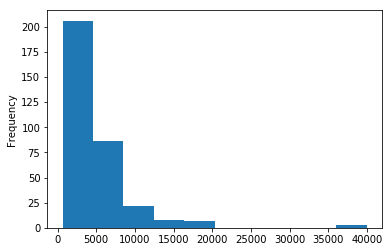

In [4]:
#interrogate data columns with boxplots to determine bext scaling approach
df_bank['ApplicantIncome'].plot(kind='hist')

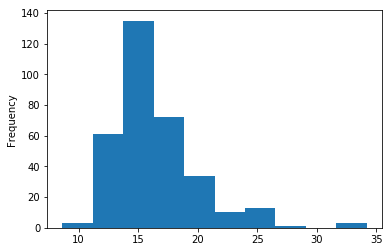

In [5]:
#ApplicantIncome has a small number of large values so transform to make it more uniform
df_bank['AI_cbrt'] = np.cbrt(df_bank['ApplicantIncome'])
df_bank['AI_cbrt'].plot(kind='hist')

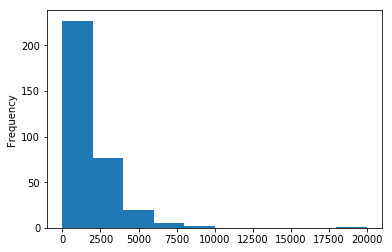

In [6]:
df_bank['CoapplicantIncome'].plot(kind='hist')

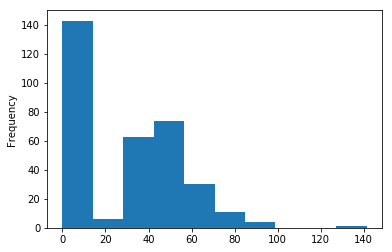

In [7]:
#Coapplicant Income also has a small number of large values, and a large number of zero values
#so use square root transform, we will also do a unit transformation after each column has been adjusted
df_bank['CI_sqrt'] = np.sqrt(df_bank['CoapplicantIncome'])
df_bank['CI_sqrt'].plot(kind='hist')

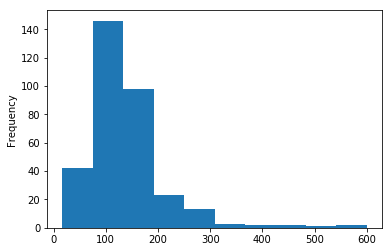

In [8]:
df_bank['LoanAmount'].plot(kind='hist')

In [9]:
#We won't apply any transformation to Loan Amount as it has a near normal distribution and we'll include it in
#the unit scaling below

In [10]:
df_bank['Loan_Amount_Term'].value_counts()
#df_bank['Loan_Amount_Term'].plot(kind='hist')

360    292
180     24
480      4
300      4
120      3
84       2
60       2
240      1
Name: Loan_Amount_Term, dtype: int64

In [11]:
#The loan amount term seems to fall into one of 8 discrete values, so we should put these into categories
map = {60:0, 84:1, 120:2, 180:3, 240:4, 300:5, 360:6, 480:7}
def map_code(x):
    return map[x]
df_bank['loan_term_code'] = df_bank['Loan_Amount_Term'].map(map_code)
df_bank['loan_term_code'].value_counts()

6    292
3     24
7      4
5      4
2      3
1      2
0      2
4      1
Name: loan_term_code, dtype: int64

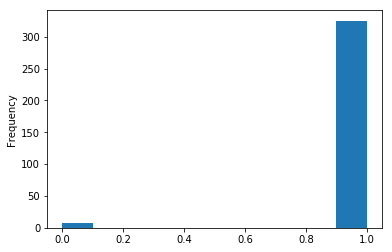

In [12]:
df_bank['Credit_History'].plot(kind='hist')

The Credit History column is either 0 or 1 so we will leave it as is.

In [13]:
#all numerical values, no missing entries
#convert to floats
np_bank = np.array(df_bank.values, dtype=float)
print(np_bank.shape)

(332, 8)


### Reuse the clustering scatter plot function from lab notebook (thanks!)

In [14]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### Now perform k-means clustering

In [15]:
k=2

In [16]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(np_bank)

### Apply a manifold-learning technique to project the data set to a 2D space

In [17]:
# append the cluster centers to the dataset
bank_data_and_centers = np.r_[np_bank,clustered_data_sklearn.cluster_centers_]

In [18]:
# project both the data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.MDS(n_components=2).fit_transform(bank_data_and_centers)
print("transformation complete")

transformation complete


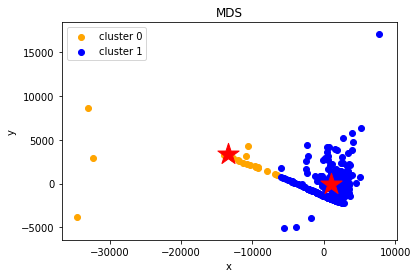

In [19]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [20]:
#after the first pass I will apply some new transofmrations to the data to 
#rescale it and see if that gets us better clustering

#remove unnecessary data
df_bank.drop(columns=['Loan_Amount_Term', 'CoapplicantIncome', 'ApplicantIncome'], inplace=True)

### Apply k-means clustering with improvements

In [33]:
#apply scaling to dataset
#min_max_scaler = preprocessing.MinMaxScaler()
#np_bank_scaled = min_max_scaler.fit_transform(df_bank)

#try standard scaler
standard_scaler = preprocessing.StandardScaler()
np_bank_scaled = min_max_scaler.fit_transform(df_bank)



In [56]:
k=2

In [57]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(np_bank_scaled)
# append the cluster centers to the dataset
bank_scaled_data_and_centers = np.r_[np_bank_scaled,clustered_data_sklearn.cluster_centers_]

In [58]:
# project both the data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.MDS(n_components=2).fit_transform(bank_scaled_data_and_centers)
print("transformation complete")

transformation complete


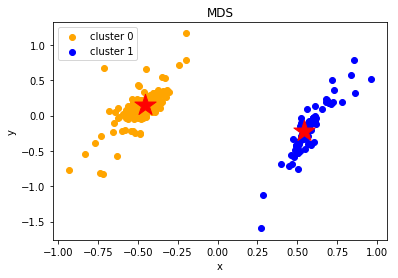

In [59]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

#### Now Use t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [60]:
# project both the data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(bank_scaled_data_and_centers)
print("transformation complete")

transformation complete


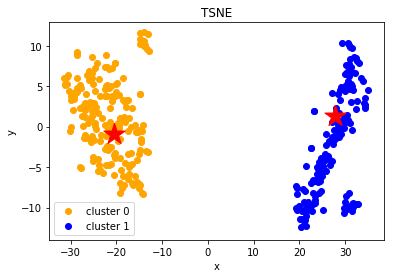

In [61]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [62]:
df_bank['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df_bank.index)

In [67]:
df_bank_3 = df_bank
df_bank_3['AI'] = df_bank_3['AI_cbrt'] * df_bank_3['AI_cbrt'] * df_bank_3['AI_cbrt']
df_bank_3['CI'] = df_bank_3['CI_sqrt'] * df_bank_3['CI_sqrt']
df_bank_3['AICI'] = df_bank_3['AI'] + df_bank_3['CI']
df_bank_3.groupby('cluster').mean()

,LoanAmount,Credit_History,AI_cbrt,CI_sqrt,loan_term_code,AI,CI,AICI
cluster,,,,,,,,
0,139.168478,0.978261,15.149468,49.565207,5.744565,3830.114130,2680.547826,6510.661956
1,143.013514,0.979730,18.208908,0.916765,5.587838,6905.554054,22.217027,6927.771081


In [71]:
df_bank_3['cluster'].value_counts()

0    184
1    148
Name: cluster, dtype: int64

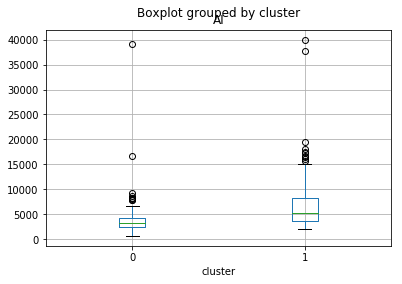

In [69]:
df_bank_3.boxplot(column='AI', by='cluster')

## Task 1 Observations

### Preprocessing
I did the following preprocessing
- ApplicantIncome has a small number of large values so I transformed it using cube root to make it more uniform
- CoApplicantIncome also had a significant number of larger positive values and a square root was applied
- The loan amount term had one of 8 discrete values, so I created a categorised feature
- the credit history was already binary encoded so it was untouched
- the amounts values were first unscaled, then scaled using a minmax scaler and finally a standard scaler

The following image shows the poor outcome from the first attempt with no scaling.
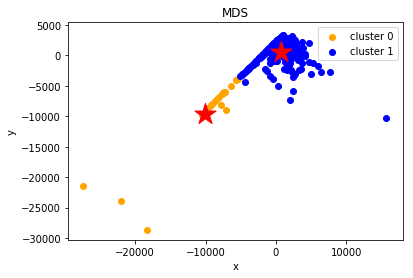

This image shows the outcome with the minmax scaler and k=3 - an unsatisfatory output as the third cluster is not clearly separate.
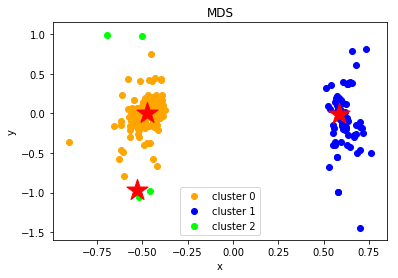

This final image shows 2 clearly separable clusters using standard scaler and k=2 in the TSNE plot
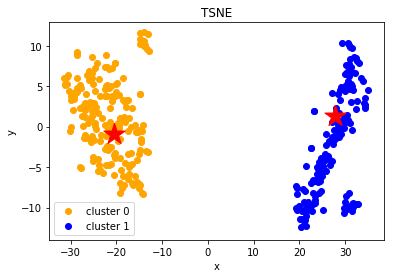

The clusters, as plotted in 2D after the mainfold transformation, do not necessarily easily relate to the discrete features in the source dataset. However, after some plotting it seems that the key attributes that separate the data are: 
- Applicant Income - clusters seem differentiated above and below 5000
- CoApplicant Income - having a coapplicant income seems to also separate the clusters


## Task 1 End

## Task 2 Begin
- Plot the sum of squared distances from the data points (in loans_dataset_et3.csv) to the centers of the k-Means clusters for various values of k. Use the Elbow method to pick the best value of k. Attempt also another method for determining the best value of k. If these methods suggest a different value of k (from the one you used in Task 1), then compute a new k-Means clustering.
- Use another clustering algorithm (from the ones available in scikit-learn) for the same dataset and an appropriate manifold-learning technique to visualise it.
- Discuss the differences between the k-Means clustering and the clustering found by the second algorithm you have tried in words (max 250 words) and by visualising the clusterings with an appropriate manifold-learning technique.

<function matplotlib.pyplot.show(*args, **kw)>

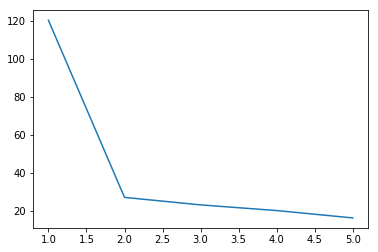

In [97]:
#run through k=0 to no_features-1
inertias = []
for k in range(np_bank_scaled.shape[1] - 1):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k+1, n_init=10, max_iter=300).fit(np_bank_scaled)
    inertias.append (clustered_data_sklearn.inertia_)

#plot inertias
ks = np.arange(1, np_bank_scaled.shape[1])
plt.plot(np.reshape(ks, -1), np.reshape(inertias, -1))
plt.show

Using the Elbow method, the plot above suggests k=2 is the best cluster size.

I've selected the MeanShift clustering method for comparison based on:
- the suggested algorithms here: https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68
- its' suitability based onadvice here: https://scikit-learn.org/stable/modules/clustering.html#

In [170]:
#Estimate the bandwidth
bandwidth = cluster.estimate_bandwidth(np_bank_scaled, quantile=0.6, n_samples=100)
print('bandwidth=', bandwidth)

clustered_data_sklearn = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=False, cluster_all=True, \
                                           min_bin_freq=1, seeds=None).fit(np_bank_scaled)
# append the cluster centers to the dataset
bank_scaled_data_and_centers = np.r_[np_bank_scaled,clustered_data_sklearn.cluster_centers_]

bandwidth= 1.0868597375037694


In [171]:
# project both the data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.MDS(n_components=2).fit_transform(bank_scaled_data_and_centers)
k = np.unique(clustered_data_sklearn.labels_).size
print("transformation complete")
print('num clusters=', np.unique(clustered_data_sklearn.labels_).size)

transformation complete
num clusters= 2


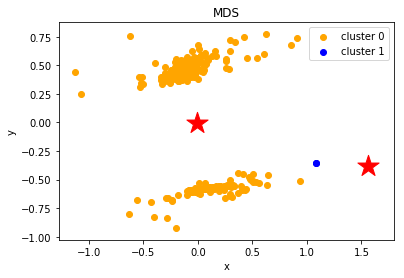

In [172]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [173]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(bank_scaled_data_and_centers)
print("transformation complete")

transformation complete


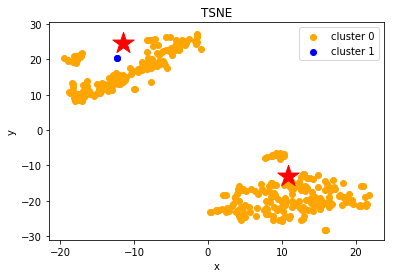

In [174]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [175]:
df_bank['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df_bank.index)
df_bank_3.groupby('cluster').mean()

,LoanAmount,Credit_History,AI_cbrt,CI_sqrt,loan_term_code,AI,CI,AICI
cluster,,,,,,,,
0,139.443769,0.987842,16.456550,28.132763,5.680851,5097.033435,1509.145653,6606.179088
1,298.666667,0.000000,22.738458,0.000000,5.000000,16613.000000,0.000000,16613.000000


After several experiments, both specifying the bandwidth and using the bandwidth estimator, the MeanShift algorithm produces a reasonably satisfactory result when:
- quantile=0.6 
- producing a bandwidth= 1.0868597375037694
- yielding 2 clusters which are:
- visually separable when viewed using a tSNE visualisation

The 2 clusters identified seem to have different characteristics:
- Applicant Income - the 2 clusters have average incomes of 5097 and 16613
- CoApplicant Income - having/not having a coapplicant income seems to also separate the clusters


## Task 2 End